In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
FF = pd.read_excel('../LeagueHistory.xlsx', sheet_name='2024') \
    .drop(['TOTAL', 'Mean', 'Std', 'Median','Year','Owner'],1) \
    .drop([12],0)
#add playoffs and place later
    
labels = np.array(FF['Team_Name'])

FF

,Team_Name,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14,Week 15,Playoffs,Place,Wins,Losses,Diff_Baseline
0,GOBias Industries,142.10,124.04,129.26,120.92,103.82,121.26,108.74,124.94,128.86,97.08,110.44,148.20,113.44,107.34,172.94,1.0,1.0,12.0,3.0,10.841556
1,Schmaap,103.64,125.66,81.58,85.32,128.56,124.10,99.98,155.42,96.32,105.42,145.06,138.32,134.76,171.50,126.68,1.0,2.0,10.0,5.0,8.770889
2,Pierogi Night,100.04,93.54,113.38,106.60,127.64,116.00,98.56,102.46,123.54,117.34,95.74,119.86,119.94,115.90,172.46,1.0,3.0,9.0,6.0,2.149556
3,Mr. Fans Noodle Haus,117.72,137.78,118.80,126.64,124.62,110.32,116.34,105.16,118.00,125.00,113.18,68.98,122.68,76.62,124.80,1.0,4.0,9.0,6.0,1.058889
4,Grip Hamilton Memorial 5k,114.46,120.90,71.50,131.50,80.14,104.18,131.64,105.20,121.84,111.38,123.98,91.48,100.98,134.52,68.00,0.0,5.0,9.0,6.0,-5.270444
5,New Drywall,127.38,106.16,168.42,119.10,112.14,123.50,134.12,117.82,103.90,96.30,110.98,125.86,127.92,162.78,136.48,0.0,6.0,8.0,7.0,12.140222
6,Pay Dirt & Pylons IV,93.86,146.84,117.86,120.88,176.78,130.12,85.54,123.46,112.84,136.52,115.14,113.60,113.26,154.66,107.94,0.0,7.0,8.0,7.0,10.569556
7,8Chane,124.36,138.42,86.06,105.34,114.86,86.42,107.96,147.70,102.20,80.74,95.54,91.38,121.30,133.78,118.94,0.0,8.0,6.0,9.0,-2.383778
8,Bijan the second date,88.62,115.72,112.44,108.22,90.80,92.06,110.06,131.84,119.28,101.48,96.94,66.66,130.52,132.52,105.70,0.0,9.0,6.0,9.0,-5.859778
9,Herbin Legends,139.68,77.56,89.98,103.64,90.06,122.20,122.06,80.32,111.38,92.24,102.32,120.46,81.30,48.46,96.88,0.0,10.0,6.0,9.0,-14.147778


In [4]:
averages = np.zeros(15)
for z in range(15):
    averages[z] = np.mean(FF.loc[:,'Week '+str(z+1)])

cumulatives = np.zeros(180).reshape(12, 15)
for c in range(15):
    for r in range(12):
        cumulatives[r, c] = np.sum(FF.loc[r, 'Week 1': 'Week '+str(c+1)])
    
average_cum_per_week = np.mean(cumulatives, axis=0)
average_cum_per_week

array([  110.78833333,   227.73833333,   332.78166667,   444.475     ,
         558.39833333,   667.19333333,   775.61666667,   893.68166667,
        1005.93333333,  1111.73666667,  1225.12333333,  1334.5       ,
        1449.81166667,  1571.90666667,  1690.75666667])

In [5]:
cum_diffs = cumulatives.copy()
for r in range(12):
    cum_diffs[r,:] = cum_diffs[r,:] - average_cum_per_week

cum_diffs = np.hstack((np.zeros(24).reshape(12,2), cum_diffs))
cum_diffs = cum_diffs[:, 1:]

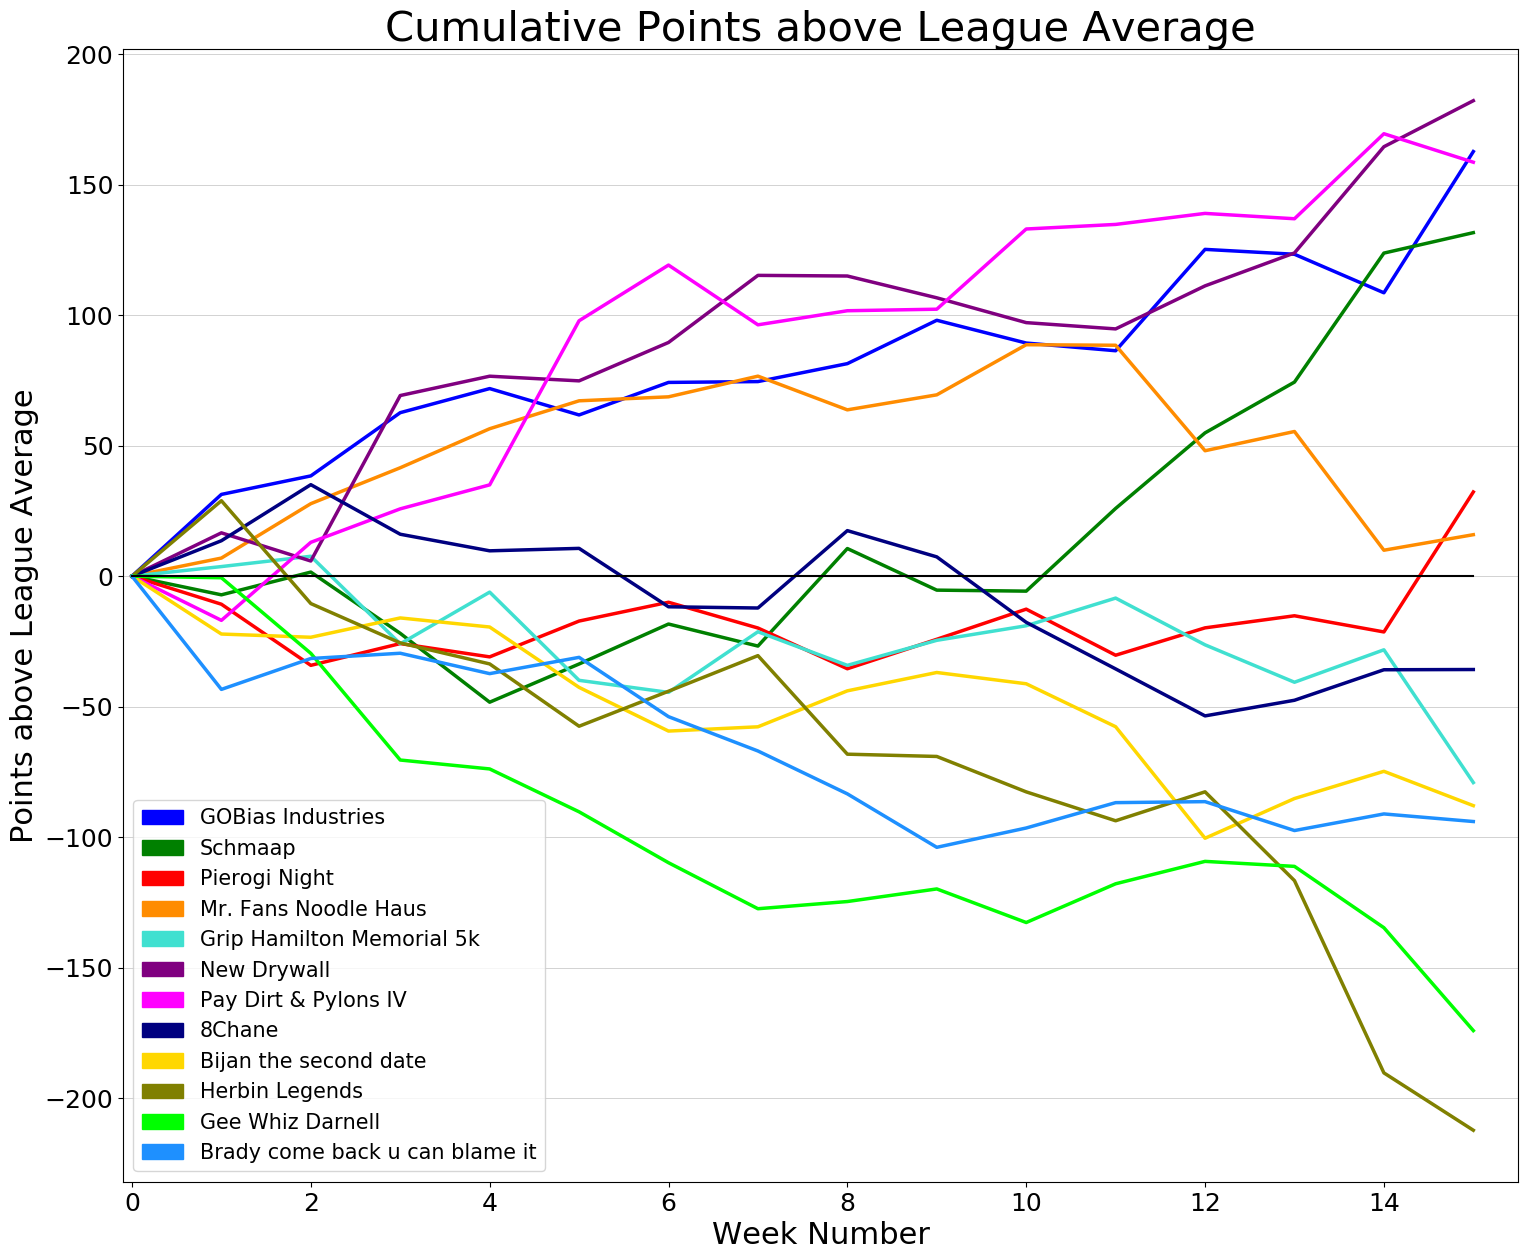

In [6]:
plt.figure(figsize=[18, 15])

colors = ['blue', 'green', 'red', 'darkorange', 'turquoise', 'purple',
          'magenta', 'navy', 'gold', 'olive', 'lime', 'dodgerblue']

patches = []
for i in range(12):
    plt.plot(np.array(cum_diffs[i,:]), colors[i], lw=2.5)
    patches.append(mpatches.Patch(color=colors[i], label=labels[i]))
    

plt.plot([0.0,15], [0,0], color = 'k')

plt.xlim([-0.1, 15.5])
plt.xlabel('Week Number', size=22)
plt.ylabel('Points above League Average', size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title('Cumulative Points above League Average', size=30)

plt.legend(handles=patches,prop={'size':15})
plt.grid(axis='y', lw=0.4)

# Schmaap special 

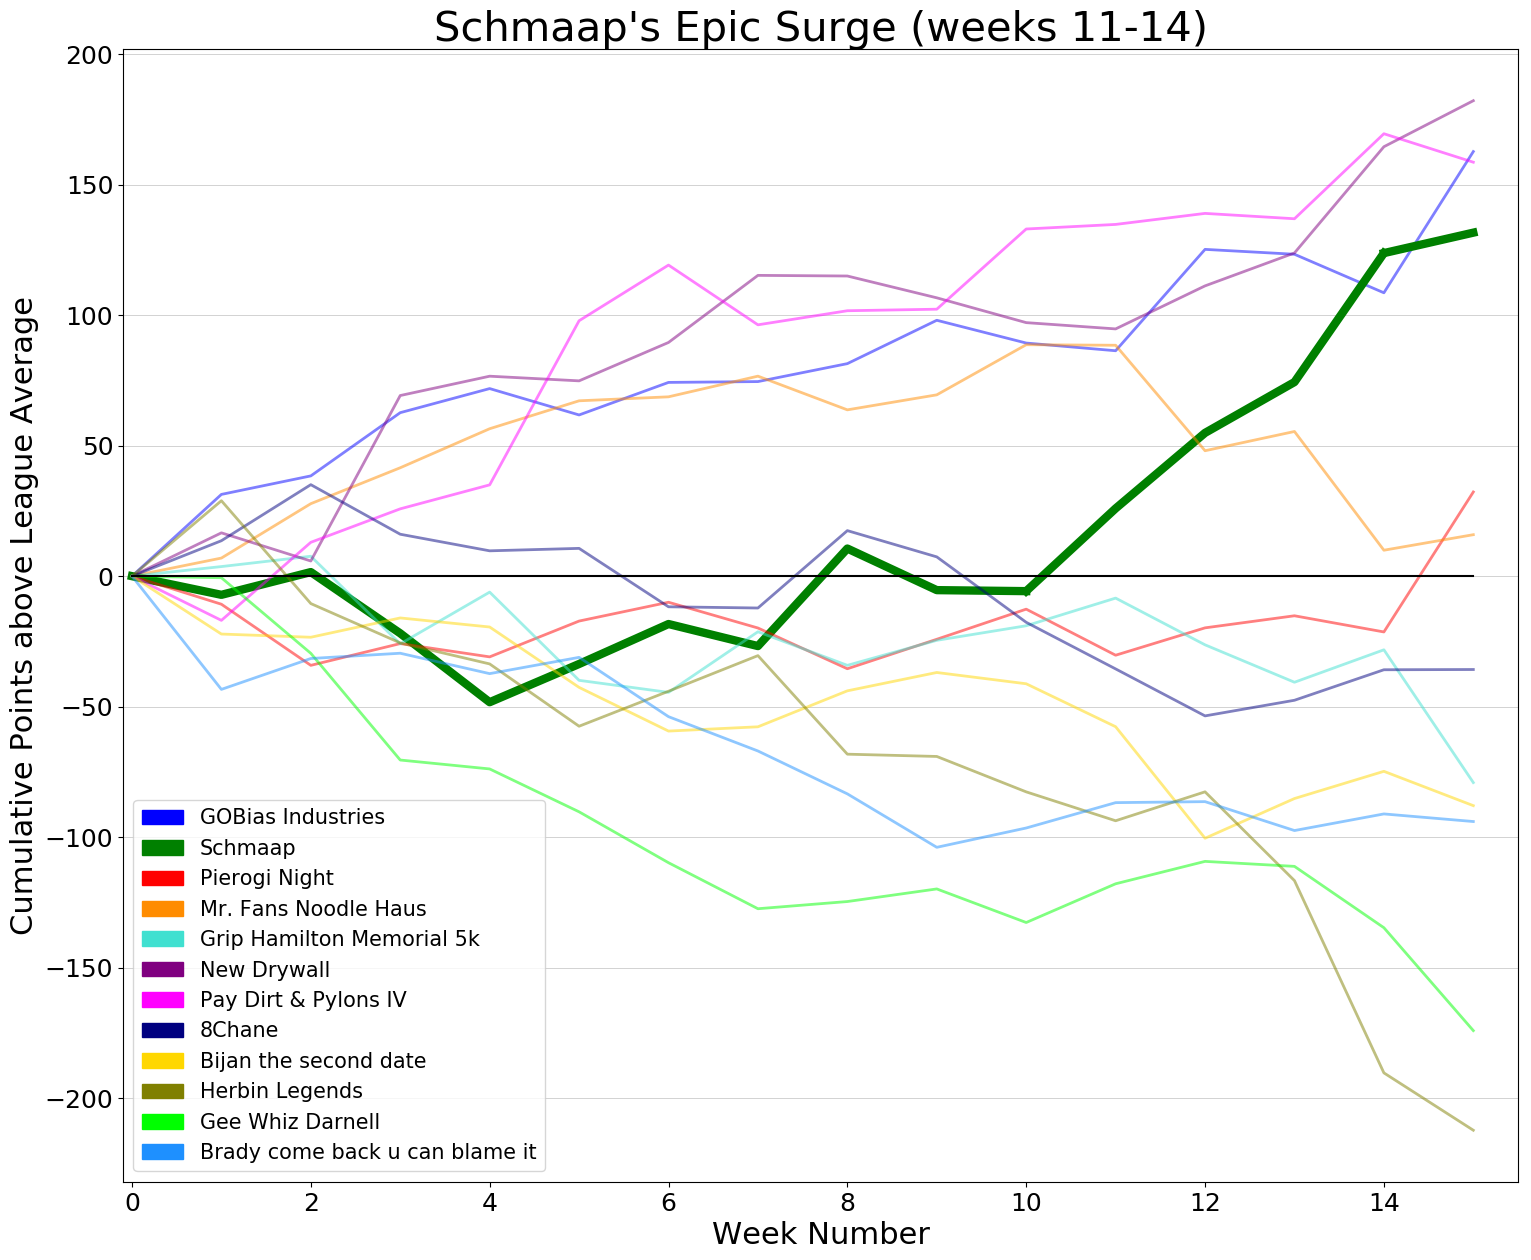

In [30]:
plt.figure(figsize=[18, 15])

colors = ['blue', 'green', 'red', 'darkorange', 'turquoise', 'purple',
          'magenta', 'navy', 'gold', 'olive', 'lime', 'dodgerblue']

patches = []
for i in range(12):
    # Regular line plot for all lines except green
    if i != 1:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=2, alpha = 0.5)
    else:
    # For the green line, plot in two parts: before and after bold section
        plt.plot(np.array(cum_diffs[i, :11]), colors[i], lw=6)  # Regular width for weeks 1-9
        plt.plot(range(10, 15), np.array(cum_diffs[i, 10:15]), colors[i], lw=6)   # Bold for weeks 10-13
        plt.plot(range(14, 16), np.array(cum_diffs[i, 14:16]), colors[i], lw=6)   # Regular width for weeks 14 onwards
        
    patches.append(mpatches.Patch(color=colors[i], label=labels[i]))

plt.plot([0.0, 15], [0, 0], color='k')

plt.xlim([-0.1, 15.5])
plt.xlabel('Week Number', size=22)
plt.ylabel('Cumulative Points above League Average', size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Schmaap's Epic Surge (weeks 11-14)", size=30)

plt.legend(handles=patches, prop={'size': 15})
plt.grid(axis='y', lw=0.4)

# GOBias Industries 

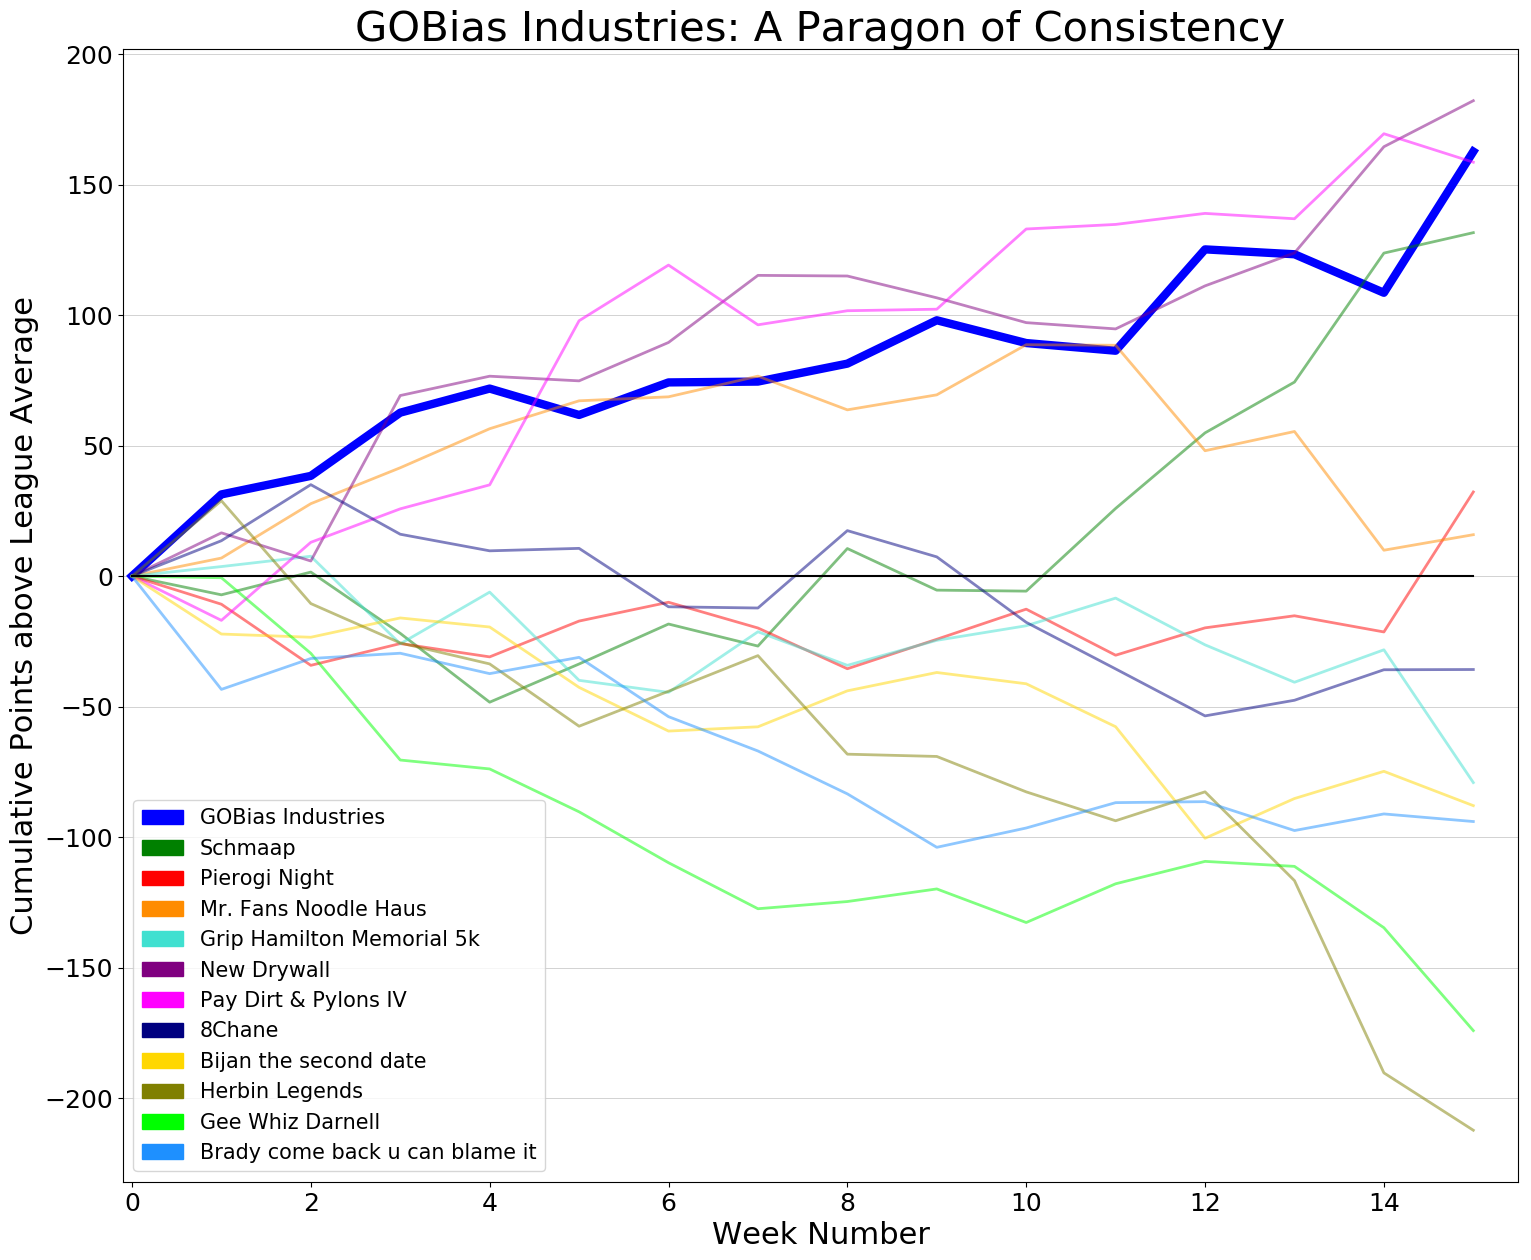

In [33]:
plt.figure(figsize=[18, 15])

colors = ['blue', 'green', 'red', 'darkorange', 'turquoise', 'purple',
          'magenta', 'navy', 'gold', 'olive', 'lime', 'dodgerblue']

patches = []
for i in range(12):
    # Regular line plot for all lines except green
    if i != 0:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=2, alpha = 0.5)
    else:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=6)  # wider 1-9
    patches.append(mpatches.Patch(color=colors[i], label=labels[i]))

plt.plot([0.0, 15], [0, 0], color='k')

plt.xlim([-0.1, 15.5])
plt.xlabel('Week Number', size=22)
plt.ylabel('Cumulative Points above League Average', size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("GOBias Industries: A Paragon of Consistency", size=30)

plt.legend(handles=patches, prop={'size': 15})
plt.grid(axis='y', lw=0.4)